<h2>Introduction</h2>
<br>
Welcome to this new notebook, where the goal is to predict whether a person earns more or less than 50K/year
<br>
Classification problem, let's dive into it !

<b>Importing stuff</b>

In [47]:
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

<b>Reading the dataset</b>

In [2]:
df = pd.read_csv("census_data.csv")

In [3]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [6]:
df.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
dtype: object

In [15]:
df[['education','education_num']].drop_duplicates()

,education,education_num
0,Bachelors,13
2,HS-grad,9
3,11th,7
5,Masters,14
6,9th,5
10,Some-college,10
13,Assoc-acdm,12
14,Assoc-voc,11
15,7th-8th,4
20,Doctorate,16


<b>Here we can see that the education_num is refering to the education level, so we can drop the education column</b>

In [16]:
df = df.drop('education',axis=1)

<b>Let's split our train and test datasets</b>

In [85]:
x = df.drop('income_bracket',axis=1)
y = df['income_bracket']

<b>Let's check the two possible string labels, and convert them to numerical values</b>

In [86]:
y.unique()

array([' <=50K', ' >50K'], dtype=object)

In [87]:
y = y.apply(lambda x: 1 if x == ' >50K' else 0)

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

<b>We saw that there are categorical features, and numerical features.
<br>

Let's first create our categorical features columns</b>

In [133]:
workclass         = tf.feature_column.categorical_column_with_hash_bucket('workclass',hash_bucket_size=1000)
marital_status    = tf.feature_column.categorical_column_with_hash_bucket('marital_status',hash_bucket_size=1000)
occupation        = tf.feature_column.categorical_column_with_hash_bucket('occupation',hash_bucket_size=1000)
relationship      = tf.feature_column.categorical_column_with_hash_bucket('relationship',hash_bucket_size=1000)
race              = tf.feature_column.categorical_column_with_hash_bucket('race',hash_bucket_size=1000)
gender            = tf.feature_column.categorical_column_with_hash_bucket('gender',hash_bucket_size=1000)
native_country    = tf.feature_column.categorical_column_with_hash_bucket('native_country',hash_bucket_size=1000)

In [134]:
workclass = tf.feature_column.embedding_column(workclass,3)
marital_status = tf.feature_column.embedding_column(marital_status,3)
occupation = tf.feature_column.embedding_column(occupation,3)
relationship = tf.feature_column.embedding_column(relationship,3)
race = tf.feature_column.embedding_column(race,3)
gender = tf.feature_column.embedding_column(gender,3)
native_country = tf.feature_column.embedding_column(native_country,3)

<b>Let's now create our numerical features columns
<br>

But first, let's check the ranges, for normalization purpose</b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000167F1D37EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000167F1E59DD8>]], dtype=object)

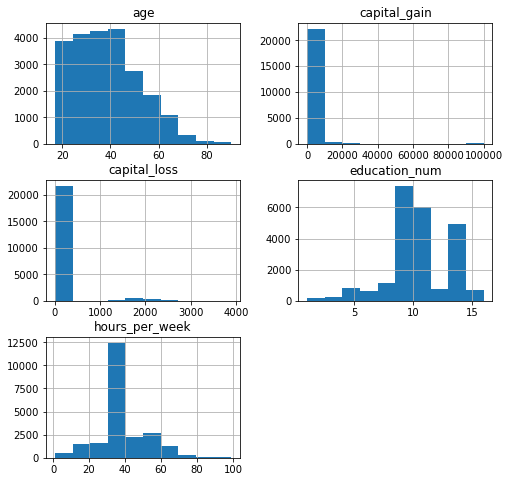

In [46]:
x_train.hist(figsize=(8,8))

<b>We notice that indeed, our numerical features need to be rescaled. Let's use a StandardScaler for that purpose</b>

In [135]:
x_train_num = x_train[['age','education_num','capital_gain','capital_loss','hours_per_week']]

In [136]:
std_scaler = StandardScaler()

In [137]:
x_train_num_scaled = std_scaler.fit_transform(x_train_num)

In [138]:
x_train_num_scaled = pd.DataFrame(data=x_train_num_scaled, columns=x_train_num.columns, index=x_train_num.index)

In [139]:
x_train_num_scaled.head()

,age,education_num,capital_gain,capital_loss,hours_per_week
20895,-1.214043,-0.419826,-0.146064,-0.217419,-1.016488
3384,0.621789,-0.419826,1.896761,-0.217419,-0.040892
1832,0.548356,-0.031250,-0.146064,-0.217419,-1.341686
18919,0.548356,-0.031250,-0.146064,-0.217419,0.609505
31685,1.576422,-0.419826,-0.146064,-0.217419,-0.040892


In [140]:
x_train_scaled = pd.concat([x_train_num_scaled, x_train[['workclass',\
                                                            'marital_status',\
                                                            'occupation',\
                                                            'relationship',\
                                                            'race',\
                                                            'gender',\
                                                            'native_country']]],axis=1)

<b>Let's perform the same operations for the x_test dataset</b>

In [142]:
x_test_num = x_test[['age','education_num','capital_gain','capital_loss','hours_per_week']]
x_test_num_scaled = std_scaler.fit_transform(x_test_num)
x_test_num_scaled = pd.DataFrame(data=x_test_num_scaled, columns=x_test_num.columns, index=x_test_num.index)
x_test_scaled = pd.concat([x_test_num_scaled, x_test[['workclass',\
                                                            'marital_status',\
                                                            'occupation',\
                                                            'relationship',\
                                                            'race',\
                                                            'gender',\
                                                            'native_country']]],axis=1)

<b>Let's now create our continuous feature columns</b>

In [143]:
age                = tf.feature_column.numeric_column('age')
education_num      = tf.feature_column.numeric_column('education_num')
capital_gain       = tf.feature_column.numeric_column('capital_gain')
capital_loss       = tf.feature_column.numeric_column('capital_loss')
hours_per_week     = tf.feature_column.numeric_column('hours_per_week')

<b>Our total features will then be</b>

In [144]:
feat_cols = [workclass,
            education_num,
            marital_status,
            occupation,
            relationship,
            race,
            gender,
            native_country,
            age,
            capital_gain,
            capital_loss,
            hours_per_week]

<b>Let's create our input functions for the Estimator</b>

In [145]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train_scaled, y_train,batch_size=100,num_epochs=10000,shuffle=True)

In [146]:
predict_func = tf.estimator.inputs.pandas_input_fn(x_test_scaled,batch_size=100,num_epochs=1,shuffle=False)

In [147]:
x_train_scaled.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass,marital_status,occupation,relationship,race,gender,native_country
20895,-1.214043,-0.419826,-0.146064,-0.217419,-1.016488,Private,Never-married,Adm-clerical,Own-child,White,Female,United-States
3384,0.621789,-0.419826,1.896761,-0.217419,-0.040892,Private,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,United-States
1832,0.548356,-0.031250,-0.146064,-0.217419,-1.341686,Local-gov,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
18919,0.548356,-0.031250,-0.146064,-0.217419,0.609505,State-gov,Divorced,Adm-clerical,Unmarried,White,Female,United-States
31685,1.576422,-0.419826,-0.146064,-0.217419,-0.040892,Private,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States


<b>Let's create our Dense Neural Network</b>

In [158]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[12,12,12,12],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Yassine\\AppData\\Local\\Temp\\tmpwyei9w9l', '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_session_config': None, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000}


<b>Let's train it</b>

In [159]:
dnn_model.train(input_fn=input_func,steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Yassine\AppData\Local\Temp\tmpwyei9w9l\model.ckpt.
INFO:tensorflow:step = 1, loss = 63.9914
INFO:tensorflow:global_step/sec: 145.972
INFO:tensorflow:step = 101, loss = 29.5157 (0.669 sec)
INFO:tensorflow:global_step/sec: 182.538
INFO:tensorflow:step = 201, loss = 25.8012 (0.570 sec)
INFO:tensorflow:global_step/sec: 176.359
INFO:tensorflow:step = 301, loss = 30.7219 (0.561 sec)
INFO:tensorflow:global_step/sec: 180.013
INFO:tensorflow:step = 401, loss = 36.7201 (0.542 sec)
INFO:tensorflow:global_step/sec: 182.034
INFO:tensorflow:step = 501, loss = 25.7422 (0.547 sec)
INFO:tensorflow:global_step/sec: 180.686
INFO:tensorflow:step = 601, loss = 30.0013 (0.565 sec)
INFO:tensorflow:global_step/sec: 158.203
INFO:tensorflow:step = 701, loss = 34.4004 (0.620 sec)
INFO:tensorflow:global_step/sec: 151.635
INFO:tensorflow:step = 801, loss = 35.629 (0.673 sec)
INFO:tensorflow:global_step/sec: 100.949
I

INFO:tensorflow:global_step/sec: 175.882
INFO:tensorflow:step = 8401, loss = 23.0175 (0.557 sec)
INFO:tensorflow:global_step/sec: 188.021
INFO:tensorflow:step = 8501, loss = 34.9803 (0.554 sec)
INFO:tensorflow:global_step/sec: 123.557
INFO:tensorflow:step = 8601, loss = 34.2365 (0.812 sec)
INFO:tensorflow:global_step/sec: 87.4644
INFO:tensorflow:step = 8701, loss = 21.2934 (1.147 sec)
INFO:tensorflow:global_step/sec: 82.0854
INFO:tensorflow:step = 8801, loss = 26.1022 (1.235 sec)
INFO:tensorflow:global_step/sec: 111.945
INFO:tensorflow:step = 8901, loss = 30.367 (0.849 sec)
INFO:tensorflow:global_step/sec: 161.265
INFO:tensorflow:step = 9001, loss = 26.2992 (0.632 sec)
INFO:tensorflow:global_step/sec: 169.733
INFO:tensorflow:step = 9101, loss = 24.4355 (0.593 sec)
INFO:tensorflow:global_step/sec: 167.798
INFO:tensorflow:step = 9201, loss = 24.1759 (0.594 sec)
INFO:tensorflow:global_step/sec: 159.125
INFO:tensorflow:step = 9301, loss = 26.6039 (0.623 sec)
INFO:tensorflow:global_step/sec

<b>Let's evaluate it</b>

In [160]:
from sklearn.metrics import accuracy_score

In [165]:
y_pred = []

for prediction in dnn_model.predict(input_fn=predict_func):
    
    y_pred.append(prediction['class_ids'])

INFO:tensorflow:Restoring parameters from C:\Users\Yassine\AppData\Local\Temp\tmpwyei9w9l\model.ckpt-10000


In [167]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.85965810215989358

<h2>Conclusion</h2>
<br>
We reached <b>86%</b> accuracy, which is quite good.
We still can improve the DNN performances by :
- Increasing the training steps
- Increasing the number of layers/number of neurons per layer
- Getting more data